# SMS Spam Detection Project
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Overview
The goal of this project is to develop a robust machine learning system that can automatically classify SMS messages as **spam** or **ham (not spam)**. This system aims to enhance digital communication security by identifying unsolicited or malicious messages in real-time.

## Datasets
1. **SMS Spam Collection**
   - Contains 5,574 SMS messages labeled as `ham` or `spam`.
   - Columns:
     - `v1`: Class label (ham/spam)
     - `v2`: SMS text

2. **Second Dataset (CSV)**
   - A simpler CSV file designed for educational purposes.
   - Columns:
     - `Class`: Output label (spam/ham)
     - `Message`: SMS text

## Project Methodology

### 1. Data Understanding
- Explore the datasets to understand class distribution, message lengths, and frequent words.
- Visualize patterns in spam vs ham messages.

### 2. Data Preprocessing
- Clean text by lowercasing, removing punctuation, numbers, and stopwords.
- Tokenize messages and apply optional lemmatization/stemming.
- Engineer features such as TF-IDF vectors, n-grams, message length, digit count, and URL/phone number presence.
- Handle class imbalance using oversampling, undersampling, or class weights.

### 3. Model Selection
- Baseline models: Logistic Regression, Naive Bayes (Multinomial).
- Advanced models: Random Forest, Gradient Boosting (XGBoost/LightGBM), or Deep Learning models (LSTM, BERT).
- Ensure interpretability using SHAP or LIME for explainable predictions.

### 4. Model Training
- Split data into training, validation, and test sets (stratified).
- Tune hyperparameters using Grid Search or Bayesian Optimization.
- Use cross-validation to ensure robustness.
- Evaluate using F1-score, precision, recall, and ROC-AUC.

### 5. Model Evaluation
- Analyze confusion matrices and error cases.
- Visualize ROC and PR curves.
- Ensure high performance on minority class (spam).

### 6. Deployment
- Deploy the model via an API (FastAPI or Flask) for real-time or batch predictions.
- Include logging and monitoring for model performance and data drift.
- Maintain compliance with privacy and regulatory standards.
- Provide explanations for predictions using SHAP or LIME.

### 7. Maintenance
- Periodically retrain the model with new SMS data.
- Update features and rules to adapt to emerging spam patterns.
- Version control datasets, models, and pipelines for reproducibility.

## Summary
This project combines robust text preprocessing, feature engineering, and machine learning to deliver an accurate and interpretable SMS spam detection system. The methodology ensures compliance with industry standards, provides explainable results, and can adapt to evolving SMS communication patterns.


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing and feature extraction
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Interpretability
import shap
import lime
from lime.lime_text import LimeTextExplainer

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the datasets with proper encoding
file1 = r"C:\Users\AKINMADE FARUQ\Downloads\PROJECT MATERIALS\My Projects\GITHUB\Spam Detection Model\spam1.csv"
file2 = r"C:\Users\AKINMADE FARUQ\Downloads\PROJECT MATERIALS\My Projects\GITHUB\Spam Detection Model\SMSSpamCollection2.csv"
file3 = r"C:\Users\AKINMADE FARUQ\Downloads\PROJECT MATERIALS\My Projects\GITHUB\Spam Detection Model\Spam_SMS 3.csv"

# Use encoding='latin-1' to avoid UnicodeDecodeError
df1 = pd.read_csv(file1, encoding='latin-1')
df2 = pd.read_csv(file2, encoding='latin-1')
df3 = pd.read_csv(file3, encoding='latin-1')

# Display basic information and first few rows of each dataset
print("Dataset 1 Info:")
print(df1.info())
print(df1.head(), "\n")

print("Dataset 2 Info:")
print(df2.info())
print(df2.head(), "\n")

print("Dataset 3 Info:")
print(df3.info())
print(df3.head())


Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3       

In [3]:
# Dataset 1 cleaning
df1 = df1[['v1', 'v2']]  # keep only relevant columns
df1.columns = ['label', 'message']

# Dataset 2 cleaning
# Reset column names
df2.columns = ['label', 'message']

# Dataset 3 cleaning
# Remove BOM character from the first column
df3.columns = [col.replace('\ufeff','') for col in df3.columns]
df3.columns = ['label', 'message']

# Quick check
print("Dataset 1 sample:")
print(df1.head(), "\n")

print("Dataset 2 sample:")
print(df2.head(), "\n")

print("Dataset 3 sample:")
print(df3.head())


Dataset 1 sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro... 

Dataset 2 sample:
  label                                            message
0   ham                      Ok lar... Joking wif u oni...
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...
2   ham  U dun say so early hor... U c already then say...
3   ham  Nah I don't think he goes to usf, he lives aro...
4  spam  FreeMsg Hey there darling it's been 3 week's n... 

Dataset 3 sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina..

In [4]:
# Merge all datasets
master_df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove duplicates
master_df = master_df.drop_duplicates().reset_index(drop=True)

# Check class distribution
print("Class distribution:")
print(master_df['label'].value_counts())

# Check the shape and sample data
print("\nMaster dataset shape:", master_df.shape)
print(master_df.head())


Class distribution:
label
ham     5244
spam    1107
Name: count, dtype: int64

Master dataset shape: (6351, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
# Text Preprocessing Function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

# Apply preprocessing to the master dataset
master_df['clean_message'] = master_df['message'].apply(clean_text)

# Preview cleaned messages
master_df[['message', 'clean_message']].head(10)


,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been weeks now a...
6,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...
8,WINNER!! As a valued network customer you have...,winner as a valued network customer you have b...
9,Had your mobile 11 months or more? U R entitle...,had your mobile months or more u r entitled to...


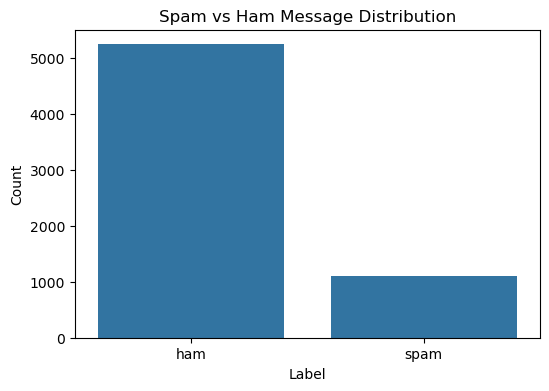

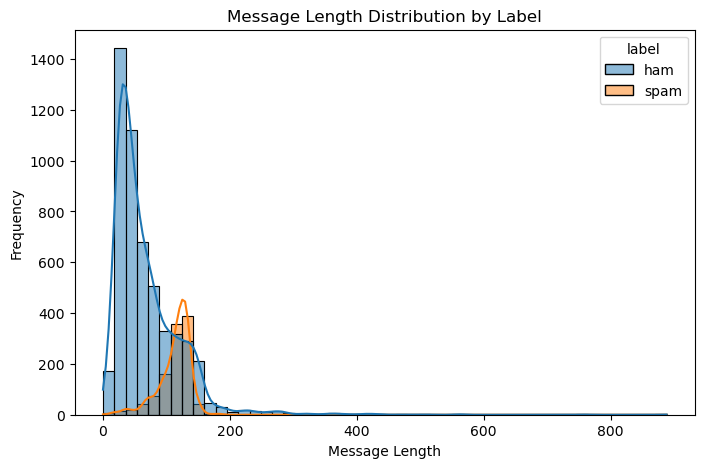

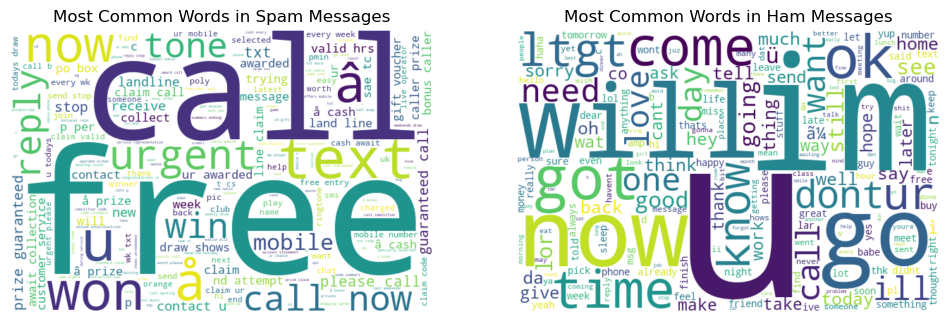

Average message length by label:
 label
ham      67.646834
spam    113.457091
Name: message_length, dtype: float64


In [6]:
# Exploratory Data Analysis (EDA)

# 1. Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=master_df)
plt.title('Spam vs Ham Message Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 2. Message length analysis
master_df['message_length'] = master_df['clean_message'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(data=master_df, x='message_length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# 3. Top 20 most frequent words in spam and ham
from collections import Counter
from wordcloud import WordCloud

# Separate spam and ham messages
spam_text = ' '.join(master_df[master_df['label']=='spam']['clean_message'])
ham_text = ' '.join(master_df[master_df['label']=='ham']['clean_message'])

# Generate word clouds
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wordcloud_spam = WordCloud(width=600, height=400, background_color='white').generate(spam_text)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Messages')

plt.subplot(1,2,2)
wordcloud_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_text)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ham Messages')

plt.show()

# 4. Average message length by label
avg_length = master_df.groupby('label')['message_length'].mean()
print("Average message length by label:\n", avg_length)


Top 10 Bigrams in Spam Messages:
[('prize guaranteed', np.int64(57)), ('urgent mobile', np.int64(49)), ('won prize', np.int64(47)), ('valid hrs', np.int64(45)), ('land line', np.int64(44)), ('nd attempt', np.int64(42)), ('await collection', np.int64(42)), ('draw shows', np.int64(41)), ('shows won', np.int64(41)), ('trying contact', np.int64(40))]

Top 10 Bigrams in Ham Messages:
[('let know', np.int64(41)), ('dont know', np.int64(33)), ('wat time', np.int64(32)), ('im going', np.int64(25)), ('ok lor', np.int64(25)), ('good morning', np.int64(24)), ('just got', np.int64(23)), ('new year', np.int64(23)), ('im gonna', np.int64(22)), ('good night', np.int64(21))]


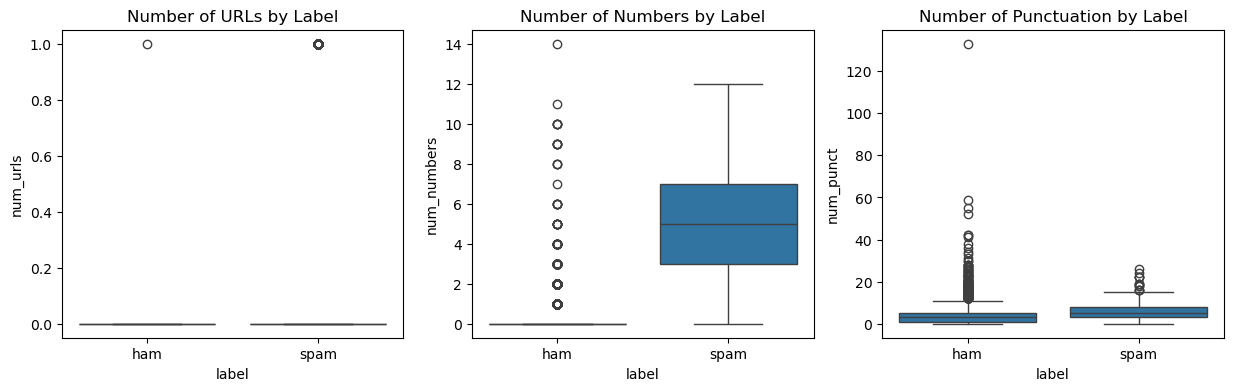

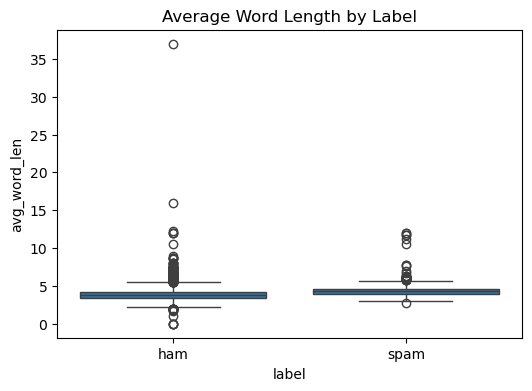

In [7]:
# Extended EDA

# 1. Top bigrams and trigrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=10, ngram_range=(2,2)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

print("Top 10 Bigrams in Spam Messages:")
print(get_top_ngrams(master_df[master_df['label']=='spam']['clean_message'], n=10, ngram_range=(2,2)))
print("\nTop 10 Bigrams in Ham Messages:")
print(get_top_ngrams(master_df[master_df['label']=='ham']['clean_message'], n=10, ngram_range=(2,2)))

# 2. Count URLs, numbers, and punctuation
master_df['num_urls'] = master_df['message'].apply(lambda x: len(re.findall(r'http\S+|www\S+|https\S+', x)))
master_df['num_numbers'] = master_df['message'].apply(lambda x: len(re.findall(r'\d+', x)))
master_df['num_punct'] = master_df['message'].apply(lambda x: len([c for c in x if c in string.punctuation]))

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x='label', y='num_urls', data=master_df)
plt.title('Number of URLs by Label')

plt.subplot(1,3,2)
sns.boxplot(x='label', y='num_numbers', data=master_df)
plt.title('Number of Numbers by Label')

plt.subplot(1,3,3)
sns.boxplot(x='label', y='num_punct', data=master_df)
plt.title('Number of Punctuation by Label')

plt.show()

# 3. Average word length per message
master_df['avg_word_len'] = master_df['clean_message'].apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split())>0 else 0)
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='avg_word_len', data=master_df)
plt.title('Average Word Length by Label')
plt.show()


In [8]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = master_df['clean_message']  # Features
y = master_df['label']          # Labels

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

# TF-IDF Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,  # limit features to top 5000
    ngram_range=(1,2),  # unigrams and bigrams
    stop_words='english'
)

# Fit TF-IDF on training data and transform both train and test sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF feature matrix shape (train):", X_train_tfidf.shape)
print("TF-IDF feature matrix shape (test):", X_test_tfidf.shape)


Training set size: 5080
Test set size: 1271
TF-IDF feature matrix shape (train): (5080, 5000)
TF-IDF feature matrix shape (test): (1271, 5000)


In [9]:
# Baseline Model Training and Evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Dictionary to store results
results = {}

# 1. Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

results['MultinomialNB'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'F1-score': f1_score(y_test, y_pred_nb, pos_label='spam')
}

print("Multinomial Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# 2. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

results['LogisticRegression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'F1-score': f1_score(y_test, y_pred_lr, pos_label='spam')
}

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Compare baseline results
results_df = pd.DataFrame(results).T
print("\nBaseline Model Comparison:")
print(results_df)


Multinomial Naive Bayes Performance:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1049
        spam       1.00      0.84      0.91       222

    accuracy                           0.97      1271
   macro avg       0.98      0.92      0.95      1271
weighted avg       0.97      0.97      0.97      1271

Confusion Matrix:
 [[1049    0]
 [  36  186]]

Logistic Regression Performance:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1049
        spam       0.99      0.80      0.89       222

    accuracy                           0.96      1271
   macro avg       0.97      0.90      0.93      1271
weighted avg       0.96      0.96      0.96      1271

Confusion Matrix:
 [[1047    2]
 [  44  178]]

Baseline Model Comparison:
                    Accuracy  F1-score
MultinomialNB       0.971676  0.911765
LogisticRegression  0.963808  0.885572


In [10]:
# Advanced Model Training
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Dictionary to store results
advanced_results = {}

# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

advanced_results['RandomForest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf, pos_label='spam')
}

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# 2. XGBoost (requires numeric labels)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # ham->0, spam->1
y_test_enc = le.transform(y_test)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train_enc)
y_pred_xgb = xgb_model.predict(X_test_tfidf)

advanced_results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test_enc, y_pred_xgb),
    'F1-score': f1_score(y_test_enc, y_pred_xgb, pos_label=1)
}

print("\nXGBoost Performance:")
print(classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_xgb))

# Compare advanced model results
advanced_results_df = pd.DataFrame(advanced_results).T
print("\nAdvanced Model Comparison:")
print(advanced_results_df)


Random Forest Performance:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1049
        spam       1.00      0.94      0.97       222

    accuracy                           0.99      1271
   macro avg       0.99      0.97      0.98      1271
weighted avg       0.99      0.99      0.99      1271

Confusion Matrix:
 [[1048    1]
 [  14  208]]

XGBoost Performance:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1049
        spam       0.99      0.87      0.93       222

    accuracy                           0.98      1271
   macro avg       0.98      0.94      0.96      1271
weighted avg       0.98      0.98      0.98      1271

Confusion Matrix:
 [[1047    2]
 [  28  194]]

Advanced Model Comparison:
              Accuracy  F1-score
RandomForest  0.988198  0.965197
XGBoost       0.976397  0.928230


In [ ]:
import shap

# Convert TF-IDF to dense (sample only first 300 rows for speed)
X_sample = X_test_tfidf[:300].toarray()

# Initialize TreeExplainer with Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_sample)

# Plot SHAP summary for the spam class (index 1)
shap.summary_plot(
    shap_values[1], 
    X_sample, 
    feature_names=tfidf.get_feature_names_out(), 
    plot_type="bar", 
    max_display=20  # only top 20 features
)


In [11]:
# Build a Pipeline
from sklearn.pipeline import Pipeline
import joblib

# Create a pipeline with TF-IDF and RandomForest
spam_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

# Train the pipeline on the training set
spam_pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred_pipe = spam_pipeline.predict(X_test)
print("Pipeline Model Performance:")
print(classification_report(y_test, y_pred_pipe))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pipe))

# Save the pipeline
joblib.dump(spam_pipeline, "spam_classifier_pipeline.pkl")
print("\nPipeline saved as spam_classifier_pipeline.pkl")


Pipeline Model Performance:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1049
        spam       1.00      0.94      0.97       222

    accuracy                           0.99      1271
   macro avg       0.99      0.97      0.98      1271
weighted avg       0.99      0.99      0.99      1271

Confusion Matrix:
 [[1048    1]
 [  14  208]]

Pipeline saved as spam_classifier_pipeline.pkl


In [12]:
# Load pipeline and test
import joblib

# Load pipeline
loaded_pipeline = joblib.load("spam_classifier_pipeline.pkl")

# Example predictions
test_msgs = [
    "Congratulations! You've won a free iPhone. Claim now!",
    "Hey, are we still on for lunch tomorrow?",
    "URGENT! Your account has been suspended. Verify immediately."
]

predictions = loaded_pipeline.predict(test_msgs)

for msg, pred in zip(test_msgs, predictions):
    print(f"Message: {msg}\nPrediction: {pred}\n")


Message: Congratulations! You've won a free iPhone. Claim now!
Prediction: spam

Message: Hey, are we still on for lunch tomorrow?
Prediction: ham

Message: URGENT! Your account has been suspended. Verify immediately.
Prediction: spam



In [13]:
# Test the Saved Pipeline
import joblib

# Load saved pipeline
loaded_pipeline = joblib.load("spam_classifier_pipeline.pkl")

# Example SMS messages to classify
test_msgs = [
    "Congratulations! You've won a free iPhone. Claim now!",
    "Hey, are we still on for lunch tomorrow?",
    "URGENT! Your account has been suspended. Verify immediately.",
    "Don't forget the meeting at 10am today.",
    "Winner!! You have been selected for a cash prize."
]

# Get predictions
predictions = loaded_pipeline.predict(test_msgs)

# Display results
for msg, pred in zip(test_msgs, predictions):
    print(f"Message: {msg}\nPrediction: {pred}\n")


Message: Congratulations! You've won a free iPhone. Claim now!
Prediction: spam

Message: Hey, are we still on for lunch tomorrow?
Prediction: ham

Message: URGENT! Your account has been suspended. Verify immediately.
Prediction: spam

Message: Don't forget the meeting at 10am today.
Prediction: ham

Message: Winner!! You have been selected for a cash prize.
Prediction: spam



In [14]:
# Test the Saved Pipeline with Probabilities
import joblib

# Load saved pipeline
loaded_pipeline = joblib.load("spam_classifier_pipeline.pkl")

# Example SMS messages to classify
test_msgs = [
    "Congratulations! You've won a free iPhone. Claim now!",
    "Hey, are we still on for lunch tomorrow?",
    "URGENT! Your account has been suspended. Verify immediately.",
    "Don't forget the meeting at 10am today.",
    "Winner!! You have been selected for a cash prize."
]

# Get predictions and probabilities
predictions = loaded_pipeline.predict(test_msgs)
probabilities = loaded_pipeline.predict_proba(test_msgs)

# Display results
for msg, pred, prob in zip(test_msgs, predictions, probabilities):
    print(f"Message: {msg}")
    print(f"Prediction: {pred}")
    print(f"Confidence (ham={prob[0]:.4f}, spam={prob[1]:.4f})\n")


Message: Congratulations! You've won a free iPhone. Claim now!
Prediction: spam
Confidence (ham=0.1450, spam=0.8550)

Message: Hey, are we still on for lunch tomorrow?
Prediction: ham
Confidence (ham=1.0000, spam=0.0000)

Message: URGENT! Your account has been suspended. Verify immediately.
Prediction: spam
Confidence (ham=0.3693, spam=0.6307)

Message: Don't forget the meeting at 10am today.
Prediction: ham
Confidence (ham=1.0000, spam=0.0000)

Message: Winner!! You have been selected for a cash prize.
Prediction: spam
Confidence (ham=0.3406, spam=0.6594)



# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade